# Case study on Supervised learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [2]:
iris_df=pd.read_excel('C:/Users/HP/Downloads/iris (2).xls')

In [3]:
iris_df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. Do necessary pre-processing steps.

In [7]:
# CHECK IF THERE IS ANY NULL VALUE PRESENT IN THE DATA SET

iris_df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

OBSERVATION:
        Null values present in SL,SW and PL columns

In [8]:
#FILL THE NULL VALUES WITH THE MEAN OF THE CORRESPONDING COLUMNS

iris_df['SL']=iris_df['SL'].fillna(iris_df['SL'].mean())
iris_df['SW']=iris_df['SW'].fillna(iris_df['SW'].mean())
iris_df['PL']=iris_df['SL'].fillna(iris_df['PL'].mean())

In [9]:
iris_df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

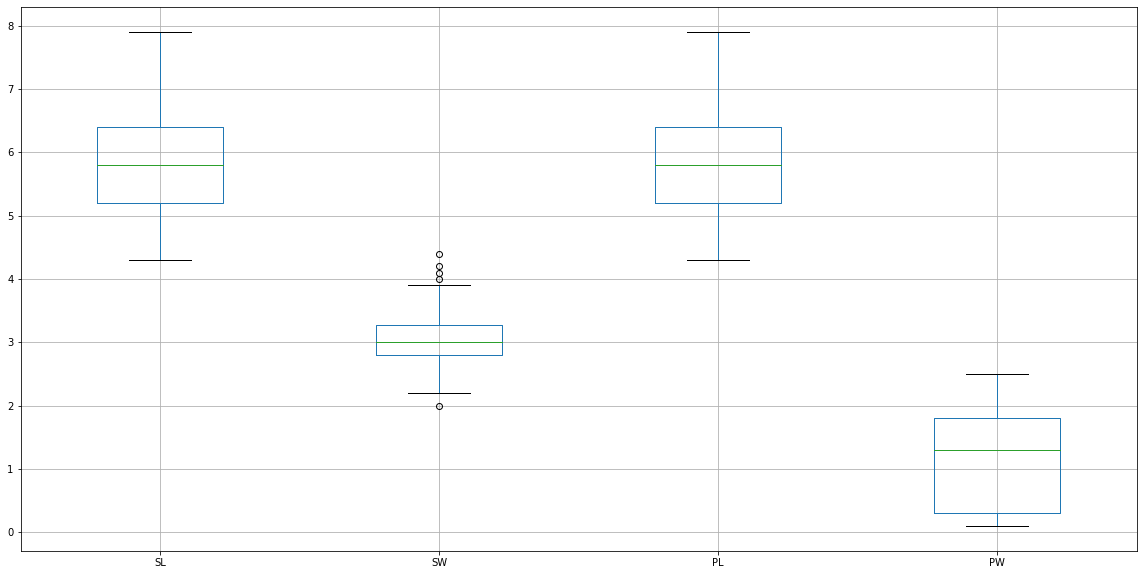

In [10]:
#CHECH ANY OUTLIERS PRESENT IN THE DATASET

plt.figure(figsize=(20,10))
iris_df.boxplot()

There are four outliers in sepal width.
since these are nearer to the upper and lower limit values  we consider the outliers for furthur processing

In [11]:
#CHECK THE DATA TYPES 
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
#SINCE CLASSIFICATION COLUMN IS OBJECT TYPE, ENCODE THE COLUMN USING MAP METHOD

from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
cl=['Classification']
for i in np.arange(len(cl)):
    iris_df[cl[i]]=labelenc.fit_transform(iris_df[cl[i]])

In [13]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [14]:
iris_df.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.099250,1.000000,0.800726,0.773593
SW,-0.099250,1.000000,-0.099250,-0.340278,-0.405818
PL,1.000000,-0.099250,1.000000,0.800726,0.773593
PW,0.800726,-0.340278,0.800726,1.000000,0.956464
Classification,0.773593,-0.405818,0.773593,0.956464,1.000000


<AxesSubplot:>

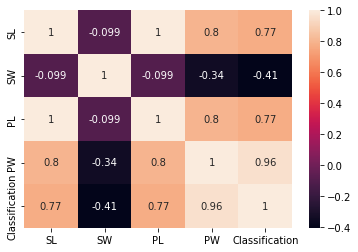

In [15]:
sns.heatmap(iris_df.corr(),annot=True)

In [16]:
iris_df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,5.100000,0.2,0
1,4.900000,3.0,4.900000,0.2,0
2,5.855944,3.2,5.855944,0.2,0
3,4.600000,3.1,4.600000,0.2,0
4,5.000000,3.6,5.000000,0.2,0


# 3. Find out which classification model gives the best result to predict irisspecies.(also do random forest algorithm)

In [17]:
#DEFINE X AND Y

x=iris_df.drop('Classification',axis=1)

In [18]:
y=iris_df['Classification']

In [43]:
#SPLIT X AND Y

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=2,test_size=0.3)

In [44]:
x_train.shape

(105, 4)

In [45]:
x_test.shape

(45, 4)

In [46]:
y_train.shape

(105,)

In [47]:
y_test.shape

(45,)

# DECISION TREE ALGORITHM


In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is ",accuracy_score(y_test,y_pred_dt))
print("f1 score is ",f1_score(y_test,y_pred_dt,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_dt))

Accuracy is  0.9333333333333333
f1 score is  0.9284802043422733
Confusion Matrix 
 [[17  0  0]
 [ 0 13  2]
 [ 0  1 12]]


# LOGISTIC REGRESSION MODEL

In [50]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lm=logit_model.predict(x_test)

In [51]:
print("Accuracy is ",accuracy_score(y_test,y_pred_lm))
print("f1 score is ",f1_score(y_test,y_pred_lm,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_lm))

Accuracy is  0.9777777777777777
f1 score is  0.9761600681140911
Confusion Matrix 
 [[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


# SVM MODEL

In [52]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred_svm=svm_linear.predict(x_test)

In [53]:
print("Accuracy is ",accuracy_score(y_test,y_pred_svm))
print("f1 score is ",f1_score(y_test,y_pred_svm,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_svm))

Accuracy is  0.9777777777777777
f1 score is  0.9761600681140911
Confusion Matrix 
 [[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


# RANDOM FOREST MODEL

In [54]:
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier()
r_forest.fit(x_train,y_train)
y_pred_rt=r_forest.predict(x_test)

In [55]:
print("Accuracy is ",accuracy_score(y_test,y_pred_rt))
print("f1 score is ",f1_score(y_test,y_pred_rt,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_rt))

Accuracy is  0.9555555555555556
f1 score is  0.9521367521367522
Confusion Matrix 
 [[17  0  0]
 [ 0 14  1]
 [ 0  1 12]]


In [56]:
f_imp=pd.Series(r_forest.feature_importances_,index=x.columns).sort_values(ascending=False)*100

(array([0, 1, 2, 3]),
 [Text(0, 0, 'PW'), Text(1, 0, 'PL'), Text(2, 0, 'SL'), Text(3, 0, 'SW')])

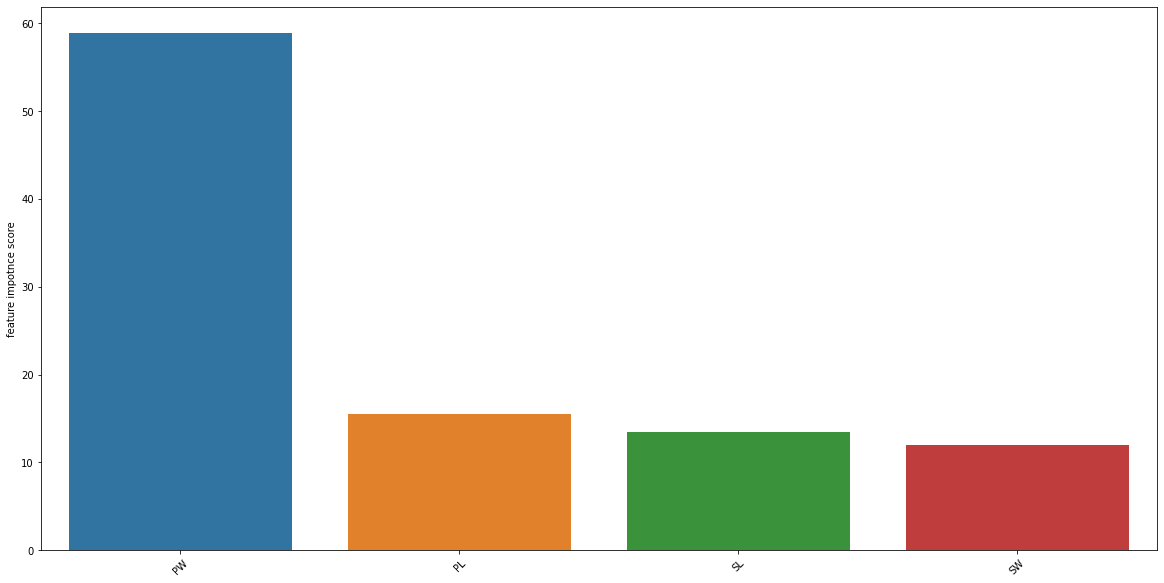

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x=f_imp.index,y=f_imp)
plt.xlabel=('features')
plt.ylabel('feature impotnce score')
plt.xticks(rotation=45)

# K NN MODEL

In [58]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 1.0,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9333333333333333,
 0.9333333333333333]

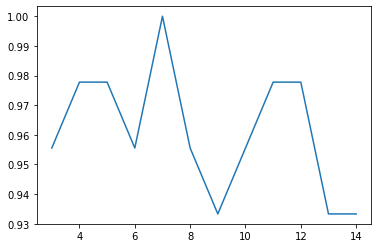

In [59]:
plt.plot(neighbours,acc_values)

In [60]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [61]:
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("f1 score is ",f1_score(y_test,y_pred,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))

Accuracy is  1.0
f1 score is  1.0
Confusion Matrix 
 [[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]


In [62]:
print("Accuracy of LogisticRegression ",accuracy_score(y_test,y_pred_lm))
print("f1 score of LogisticRegression ",f1_score(y_test,y_pred_lm,average='macro'))
print("Accuracy of Decision Tree model ",accuracy_score(y_test,y_pred_dt))
print("f1 score of Decision Tree model ",f1_score(y_test,y_pred_dt,average='macro'))
print("Accuracy of svm ",accuracy_score(y_test,y_pred_svm))
print("f1 score of svm ",f1_score(y_test,y_pred_svm,average='macro'))
print("Accuracy of Random Forest model ",accuracy_score(y_test,y_pred_rt))
print("f1 score of Random Forest model ",f1_score(y_test,y_pred_rt,average='macro'))
print("Accuracy of K NN model ",accuracy_score(y_test,y_pred))
print("f1 score of K NN model ",f1_score(y_test,y_pred,average='macro'))

Accuracy of LogisticRegression  0.9777777777777777
f1 score of LogisticRegression  0.9761600681140911
Accuracy of Decision Tree model  0.9333333333333333
f1 score of Decision Tree model  0.9284802043422733
Accuracy of svm  0.9777777777777777
f1 score of svm  0.9761600681140911
Accuracy of Random Forest model  0.9555555555555556
f1 score of Random Forest model  0.9521367521367522
Accuracy of K NN model  1.0
f1 score of K NN model  1.0


OBSERVATION

After Studying the above data which we obtained with different models we can say all the Models are performing relatively well.

K NN model gives better performance than others